# Writeup

I chose to predict if the Amazon review was negative (I could just as easily made it positive), process seemed pretty straightforward once I figured out how to deal with a text file instead of a csc.  My filter picked up 444 out of a possible 500 negative reviews, that's an 88% accuracy rate.  When I ran these same terms against the imdb file accuracy dropped to about 50%.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amazon_review1 = pd.read_table("amazon_cells_labelled.txt")
#amazon_review1 = pd.read_table("imdb_labelled.txt")

In [3]:
amazon_review1.columns = ["review", "negative"]

In [4]:
#amazon_review1.head(5)


In [5]:
#amazon_review1.iloc[:,0].str.split(expand=True).stack().value_counts() < 2

In [6]:
negative_words = ['disappointed', 'waste', 'worst', 'slow', 'poor', 'unreliable', 'avoid', 'do not','junk', 'disappointment',
                 'mistake', 'does not', 'wrong', 'disappointing', 'difficult', 'a piece of']
positive_words = []

for word in negative_words:
    amazon_review1[str(word)] = amazon_review1['review'].str.contains(' ' + str(word) + ' ', case=False)

In [7]:
amazon_review1['allcaps'] = amazon_review1['review'].str.isupper()

In [8]:
#amazon_review1['negative'] = (amazon_review1.iloc[:, 1] == 1)

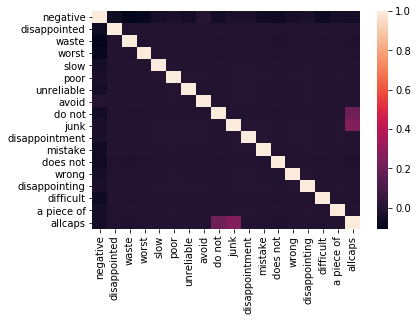

In [9]:
sns.heatmap(amazon_review1.corr())

In [10]:
data = amazon_review1[negative_words + ['allcaps']]
target = amazon_review1['negative']

In [11]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 999 points : 444


In [12]:
amazon_review1['negative'].value_counts()

1    500
0    499
Name: negative, dtype: int64